# Project:  1 How do philosopher talk?

## Introduction

In this project I will be investigating how past philosopher talk. Specifically, perform a words frequency analysis to see if I can have some interesting findings. 

Philosophers are thinkers of our worlds. They often bring new ideals, instigate reform, or propose hypothesis. An analyzsis of how those people talk can help us understand their ideas more clearly and bring fresh insight of how we look at the world.

In [60]:
#import all the packages, nltk and wordcloud need to be installed brefore importing.
#python -m nltk.downloader popular
#pip install wordcloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [61]:
#load the dataset
philosophy = pd.read_csv('philosophy_data.csv')

In [62]:
#check the dataset
philosophy.shape

(360808, 11)

In [63]:
philosophy.dtypes

title                        object
author                       object
school                       object
sentence_spacy               object
sentence_str                 object
original_publication_date     int64
corpus_edition_date           int64
sentence_length               int64
sentence_lowered             object
tokenized_txt                object
lemmatized_str               object
dtype: object

In [64]:
philosophy.sample(3)

title           author      school  \
354912                 The Second Sex         Beauvoir    feminism   
87532   Second Treatise On Government            Locke  empiricism   
327350                    Meditations  Marcus Aurelius    stoicism   

                                           sentence_spacy  \
354912  She took long journeys to attend lectures on K...   
87532   But there is another sort of servants, which b...   
327350  Be not therefore ashamed, whensoever thou must...   

                                             sentence_str  \
354912  She took long journeys to attend lectures on K...   
87532   But there is another sort of servants, which b...   
327350  Be not therefore ashamed, whensoever thou must...   

        original_publication_date  corpus_edition_date  sentence_length  \
354912                       1949                 2009               50   
87532                        1689                 2010               63   
327350                        170                 2008               70   

                                         sentence_lowered  \
354912  she took long journeys to attend lectures on k...   
87532   but there is another sort of servants, which b...   
327350  be not therefore ashamed, whensoever thou must...   

                                            tokenized_txt  \
354912  ['she', 'took', 'long', 'journeys', 'to', 'att...   
87532   ['but', 'there', 'is', 'another', 'sort', 'of'...   
327350  ['be', 'not', 'therefore', 'ashamed', 'whensoe...   

                                           lemmatized_str  
354912   -PRON- take long journey to attend lecture on...  
87532    but there be another sort of servant , which ...  
327350   be not therefore ashamed , whensoever thou mu...

In [10]:
philosophy.info

<bound method DataFrame.info of                          title author    school  \
0       Plato - Complete Works  Plato     plato   
1       Plato - Complete Works  Plato     plato   
2       Plato - Complete Works  Plato     plato   
3       Plato - Complete Works  Plato     plato   
4       Plato - Complete Works  Plato     plato   
...                        ...    ...       ...   
360803  Women, Race, And Class  Davis  feminism   
360804  Women, Race, And Class  Davis  feminism   
360805  Women, Race, And Class  Davis  feminism   
360806  Women, Race, And Class  Davis  feminism   
360807  Women, Race, And Class  Davis  feminism   

                                           sentence_spacy  \
0        What's new, Socrates, to make you leave your ...   
1       Surely you are not prosecuting anyone before t...   
2       The Athenians do not call this a prosecution b...   
3                                   What is this you say?   
4       Someone must have indicted you, for you ar

## Information about the dataset

The dataset I used for this project adopted from https://www.kaggle.com/kouroshalizadeh/history-of-philosophy. This dataset contains 360808 sentence said by famous philosophers. The time in year of when the sentence is said, and the school of which the author belongs to. 


### Flaw in the dataset
The data itself is mostly clean. For one author or school, it appears the same through out the dataset making it easy for later to search or group. The sentence is also very clean. There is typo or words incorrectly joined together. The creator of this database also provide a lowered case sentence as well as tokenized and lemmatized text. Unfortunatly those text cannot be used for our analysis. 

Another problem with this dataset is with the original publication data. Mainly the publication date of the author Plato and his respective school plato is negatvie. There are also some publication data does not correspond to an actual year. By elimination them, the dataset would loss almost 25% content. Hence, I decide to keep those data since year is not included in my analysis.

In [7]:
# tokenize takes sentence as input and output tokenize and lemmatized key words
def tokenize(i):
    token=word_tokenize(i)
    token=[j for j in token if j not in stopwords.words('english')]
    token=[j for j in token if j.isalpha()]
    token=[lemmatizer.lemmatize(j) for j in token]
    return token

In [8]:
#run the function through the dataset (This would take a while)
tokenized=[]
lemmatizer=WordNetLemmatizer()
sum=0
for i in philosophy['sentence_lowered']:
    tokenized.append(tokenize(i))

In [14]:
#check the processed df
philosophy['tokenized_txt']=tokenized
philosophy.head(3)

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   

                                       tokenized_txt  \
0  [new, socrates, make, leave, usual, haunt, lyc...   
1        [surely, prosecuting, anyone, king, archon]   
2  [athenian, call, prosecution, indictment, euth...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...

### Process the data

In order to do word frequency analysis. I have to clean each sentance to remove any pronouns, preposition, punctuation ect. Then, split each word into tokens. I also lemmatized the words, this step can reduce each words to its simplist form. 

For example:

" What's new, Socrates, to make you leave your usual haunts in the Lyceum and spend your time here by the king archon's court?"

Would become:

'new','socrates','make','leave','usual','haunt','lyceum','spend','time','king','archon','court'

## Which is the Most Famous Word Used by Philosophiers

After processing the data. I can anwser the first question: Which is the Most Famous Word Used by Philosophiers? I present the top three words used by philosophier and their respect frequency.

In [15]:
#count the words
words=[]
for i in philosophy['tokenized_txt']:
    words+=i
n_words=Counter(words)
df_words=pd.DataFrame(n_words.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
df_words.head(3)

word  frequency
48     one      50186
51   thing      28692
183  would      24614

I also make a bar chart to show the top 20 words used by philosophiers.Using this result, I can demonstrate the result visually by ploting a word cloud as shown below. This would gives us some idea on the word choice of philosopher and give us insight on interpreting how philosopher talk. 

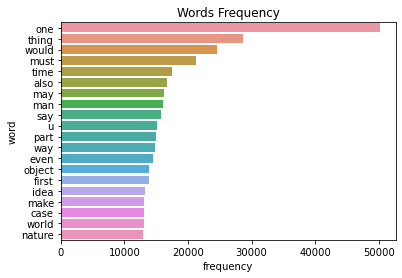

In [16]:
most_words=df_words.head(20)
words_plot=sns.barplot(y='word', x='frequency', data=most_words).set(title='Words Frequency')
plt.show()

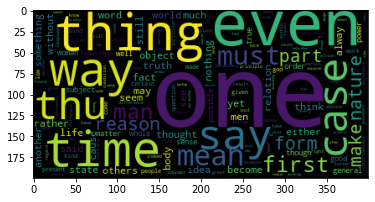

In [145]:
#generate word cloud
new_words=' '.join(words)
word_cloud =  WordCloud().generate(new_words)
plt.imshow(word_cloud)

In [25]:
#search function takes in words as input and print all the sentence containing that word and output the number of sentence
def search(word):
    sum=0
    for i in range(philosophy.shape[0]):
        if word in philosophy.iloc[i,9]:
            print(philosophy.iloc[i,3]) 
            sum+=1
    return sum

In [26]:
ones=search('one')

A not ignoble one I think
I think he is the only one of our public men to start out the right way, for it is right to care first that the young should be as good as possible, just as a good farmer is likely to take care of the young plants first, and of the others later.
So, too, Meletus first gets rid of us who corrupt the young shoots, as he says, and then afterwards he will obviously take care of the older ones and become a source of great blessings for the city, as seems likely to happen to one who started out this way.
So he has written this indictment against you as one who makes innovations in religious matters, and he comes to court to slander you, knowing that such things are easily misrepresented to the crowd.
One need not worry about them, but meet them head on.
One whom I am thought crazy to prosecute.
It is not the part of anyone to do this, but of one who is far advanced in wisdom.
Is then the man your father killed one of your relatives?
One should only watch whether the

Therefore the one, if it is not, would be unable to rotate in that in which it is not.' '
And, surely, the one isn't altered from itself either, whether as something that is or as something that is not.
For the argument would no longer be about the one, but about something else, if in fact the one were altered from itself.' '
Therefore the one, as it seems, since it is not, is both at rest and in motion.' '
Then because it moves, the one is also altered.' '
So insofar as the one that is not moves, it is altered, but insofar as it doesn't move, it is not altered.' '
Therefore the one, if it is not, is both altered and not altered.' '
Therefore also the one, if it is not, comes to be and ceases to be, if it is altered, and does not come to be or cease to be, if it is not altered.
And thus the one, if it is not, both comes to be and ceases to be, and does not come to be or cease to be.' '
Indeed, we must.' 'Aren't we saying, if one is not, what the consequences must be for it?' '
So the o

Of two people, each of whom has something bad in either body or soul, which is the more miserable one, the one who is treated and gets rid of the bad thing or the one who doesn't but keeps it?
The one who isn't treated, it seems to me.
The happiest man, then, is the one who doesn't have any badness in his soul, now that this has been shown to be the most serious kind of badness.
This is the man who gets lectured and lashed, the one who pays what is due.
The man who keeps it, then, and who doesn't get rid of it, is the one whose life is the worst.
Not paying what's due when one has done what's unjust is by its nature the first worst thing, the very worst of all.
You considered Archelaus happy, a man who committed the gravest crimes without paying what was due, whereas I took the opposite view, that whoever avoids paying his due for his wrongdoing, whether he's Archelaus Gorgias or any other man, is and deserves to be miserable beyond all other men, and that one who does what's unjust is

They knew that this part of the soul was not going to understand the deliverances of reason and that even if it were in one way or another to have some awareness of them, it would not have an innate regard for any of them, but would be much more enticed by images and phantoms night and day.
The claim that god gave divination as a gift to human folly has good support: while he is in his right mind no one engages in divination, however divinely inspired and true it may be, but only when his power of understanding is bound in sleep or by sickness, or when some sort of possession works a change in him.
Hence, whenever impurities of one sort or another, the effects of bodily illnesses, turn up all around the liver, the spleen, a loosely woven organ with hollow spaces that contain no blood, cleans them all away and absorbs them.
So, as for our questions concerning the soul to what extent it is mortal and to what extent divine; where its parts are situated, with what organs they are associate

Sisyphus between some people and others with respect to deliberating well or being good deliberators, just as some people differ from others in all other areas of expertise as, for example, some carpenters differ from others, or some doctors from others, or some pipers from others, or as tradesmen in general differ from one another?
How would you distinguish which of them was a good marksman and which was a poor one?
And the one who most often succeeded in hitting the target you would judge the winner?
But if there were no target set up for them to aim at, and each just shot wherever he pleased, how could you distinguish between the good marksman and the poor one?
And wouldn't you also be at a loss to distinguish good deliberators from bad ones, if they didn't understand what they were deliberating about?
And since it's impossible to hit upon the nonexistent, no one who's deliberating about the nonexistent could actually hit upon it.
Nor can one person be either a better or a worse del

If, however, you formulate the proposition on the strength of many cases and he has no objection to bring, you may claim that he should admit it; for a dialectical proposition is one which thus holds in several instances and to which no objection is forthcoming.
Whenever it is possible to deduce the same conclusion either through or without a reductio per impossibile, if one is demonstrating and not arguing dialectically it makes no difference which method of deduction is adopted, but in argument with another deduction per impossibile should be avoided.
For where one has deduced without the reductio per impossibile, no dispute can arise; if, on the other hand, one deduces an impossible conclusion, unless its falsehood is too plainly manifest, people deny that it is impossible, so that the questioners do not get what they want.
One should put forward propositions that hold true of several cases, and to which either no objection whatever appears or at least not any on the surface; for wh

Some Cleidemus is one of them say that lightning does not exist but appears.
If it flows in one way it is wind, in another it causes earthquakes; in the clouds, when they are in a process of chan and contract and condense into water, it is eject and causes thunder and lightning and the other phenomena of the same nature.
The same thing happens to the next part, and the next, till the series becomes one, that is, till a circle is formed; for if a figure is described by a single motion that figure must itself be one.
The former moves onward because of its rareness, and because of its rapidity passes through an object before setting fire to it or dwelling on it so as to blacken it: the slower one does blacken the object, but passes through it before it can actually burn it.
That is why resisting substances are affected, unresisting ones are not.
There are never more than two rainbows at one time.
In the inner rainbow the first and largest band is red; in the outer rainbow the band that is

If you take a wasp by the feet and let him buzz with his wings, wasps that have no stings will fly towards it, and wasps that have stings will not; from which fact it is inferred by some that one set are males and the other females.
Some build cells, small and few in number; others build many and large ones.
In the hives of bees several kings are found and they lead off detachments in swarms, but in the hornet's nest only one king is found.
Being epicures as to their food, they fly, one at a time, into kitchens and on to slices of fish and the like dainties.
As regards the disposition of animals, as has been previously observed, one may detect great differences in respect to courage and timidity, as also, even among wild animals, in regard to tameness and wildness.
The two statements made regarding him are quite true; the one that he is especially afraid of fire, as Homer pictures him in the line 'and glowing torches, which, though fierce, he dreads,' and the other, that he keeps a ste

A proof that it is so is the fact that there is more pleasure in drinking when one is thirsty than in eating when one is hungry.
Or is it because thirst is a desire for two things, namely, drink and food, but hunger is a desire for only one, namely, food?
Further, he who is thirsty needs two things, nourishment and cooling, and drink provides both of these; but he who is hungry needs one of them only.
Now he who robs another of a deposit does wrong to a friend; for no one places a deposit with another unless he trusts him.
Further, it is base not to requite like with like; for the one party in making the deposit regarded the other as his friend, but the latter in robbing him treated him as an enemy; but a lender does not lend in the spirit of friendship.
Or is it because she thinks that the good will treat her better than any one else
For example, a man who has spoken a light word would not therefore necessarily divulge a secret, would one who has betrayed an individual also betray a c

For if one wishes to bestow attention upon his body, it does not follow that he will have the best body that any one has.
No one, it is maintained, does evil voluntarily, knowing it to be evil.
But no one voluntarily does evil, knowing it to be evil.
It is also possible to apply force to an animal; for instance, when a horse is galloping straight ahead, one may take hold of him and divert his course.
For if one were to say 'I was necessitated by pleasure to debauch my friend's wife', he would be a strange person.
but with what contributes to the end; for instance, no one chooses to be in health, but we choose what leads to health, eg walking, running; but we wish for the ends.
But choice seems to be what its name suggests; I mean, we choose one thing instead of another; for instance, the better instead of the worse.
Since, then, choice, as was said before, is concerned with the goods that contribute to the end and not with the end, and with the things that are possible to us, and with 

It is not through indifference that I have put off doing so all this time, but because I was seeking how to write on this subject with more exactitude than any one else who has concerned himself therewith.
For it is absurd that one who in deeds excels all men should in words manifestly fall short of ordinary mortals, especially when he knows full well that, whereas among those whose political constitution is democracy the final appeal on all matters is to the law, among those who are under kingly rule the appeal is to reason.
I will therefore say no more, after mentioning only one topic, in enlarging on which one might spend one's whole life, namely, that reason is the thing wherein we are superior to all other animals; and we who have received the highest honour which heaven can bestow will have this above other men.
You will find two such books, one of which is my own, viz.
All actions can have both these sets of attributes applied to them, so that no one who can urge one of these tw

The reason whereof is because we, knowing not what real constitution it is of substances whereon our simple ideas depend, and which really is the cause of the strict union of some of them one with another, and the exclusion of others; there are very few of them that we can be sure are or are not inconsistent in nature: any further than experience and sensible observation reach
Herein, therefore, is founded the reality of our knowledge concerning substances That all our complex ideas of them must be such, and such only, as are made up of such simple ones as have been discovered to co exist in nature.
the names man and beast are to have significations different one from the other.
But I am not so unacquainted with the zeal of some men, which enables them to spin consequences, and to see religion threatened, whenever any one ventures to quit their forms of speaking, as not to foresee what names such a proposition as this is like to be charged with: and without doubt it will be asked, If c

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The statement in and the one in also which you call 'apparently self consistent' is actually refutable.
Moreover, one might distinguish between first and third person formulations of the problem, and in the latter case, whether it is a subject who really knows or merely thinks he or she knows.
To discuss his treatment of the problem, one should remember that my point is about a resolution made in advance to ignore certain types of evidence.
One might make a resolution to ignore particular evidence even when one is forcibly confronted with it, but this is often more difficult to keep.
Well, one need not disagree with what Harman says about the acquisition of the new evidence (at least for typical cases).
One should certainly construe the resolution to include a more specific form, avoiding contact with some specific counterevidence to, though usually one will not know of it.
Harman is right to say that if such contact nevertheless occurs, one may well lose the knowledge that, and hence 

Here once more there is needed a step like the one taken in relativity theory.
Or again: I am inclined to believe that not everything that has the form of an empirical proposition is one.
Is it that rule and empirical proposition merge into one another.
even when I turn round, and even when no one is there to see it?
This doubt isn't one of the doubts in our game.
But wouldn't one have to say then, that there is no sharp boundary between propositions of logic and empirical propositions?
Here one must, I believe, remember that the concept 'proposition' itself is not a sharp one.
One almost wants to say any empirical proposition can, theoretically, be transformed. .
Here one would surely say You don't know?
One cannot make experiments if there are not some things that one does not doubt.
But that does not mean that one takes certain presuppositions on trust.
As soon as I think of an everyday use of the sentence instead of a philosophical one, its meaning becomes clear and ordinary.
We se

It is always, by its very nature, at a crossroads: one path explores man's negativity to the furthest point, where love and death, day and night, the atemporal repetition of things and the haste of the passing seasons all belong to each other without division and end up philosophising with a hammer.
Nothing in that speaks of any recognisable world, neither this one nor any other.
All that is present is the most interior, and at the same time the most savagely free of all forces: the one that dismembers bodies in the Gran Disparate, the one that runs wild and gouges out eyes in Raging Madness.
uncontrolled use of one person by another, an excessive use of violence, an unlimited application of the right to kill this whole society, whose sole bond is the refusal of any bond, appears to be a radical dismissal of nature and the only cohesion demanded of the individuals who make up the group is to protect not natural existence, but the free exercise of sovereignty over and against nature.
Th

Since more than a century of ruptures, of surpassings with or without overturnings, rarely has a relation to Hegel been so little definable: a complicity without reserve accompanies Hegelian discourse, takes it seriously up to the end, without an objection in philosophical form, while, however, a certain burst of laughter exceeds it and destroys its sense, or signals, in any event, the extreme point of experience which makes Hegelian discourse dislocate itself; and this can be done only through close scrutiny and full knowledge of what one is laughing at.
One could describe as a scene, but we will not do so here, the history of Bataille's relations to Hegel's different faces: the one that assumed absolute rending the one who thought he would go mad the one who, between Wolff and Comte and the clouds of professors at the village wedding that is philosophy, asks himself no questions, while alone, his head aching, Kierkegaard questions the one who towards the end of his life, no longer pu

But the same does not hold true in the case of desiring machines as molecular elements: there, use, functioning, production, and formation are one and the same process.
The exegetical meaning (what is said about the thing) is only one element among others, and is less important than the operative use (what is done with the thing) or the positional functioning (the relationship with other things in one and the same complex), according to which the symbol is never in a one to one relationship with what it means, but always has a multiplicity of referents, being always multivocal and polysemous.
The ethnologist finds himself before a flow of hair, with the breaks in such a flow, and with what passes from one state into another through the break.
In reality, it is a question of knowing how one conceives of sexuality and libidinal investment.
R.P., devoted to objects of fetishism, is that in its pages ethnologists do not place one theory in opposition to another, but reflect on the bearing 

Which, among the things you do not know, is the one which you propose to look for?
But all this is merely what is left in the wake of reasoning and perception which, seen contemporaneously, must necessarily, on pain of ceasing to hang together, take in simultaneously everything necessary to their realization, and consequently be present to themselves with no intervening distance, in one indivisible intention.
If the sole experience of the subject is the one which I gain by coinciding with it, if the mind, by definition, eludes 'the outside spectator' and can be recognized only from within, my cogito is necessarily unique, and cannot be 'shared in' by another.
the cogito from thoughts to the I, equally necessarily leads from the multiplicity of I's to one sole constituting consciousness, and prevents me from entertaining any vain hope of salvaging the finiteness of the subject by defining it as a 'monad'.
If we try to maintain that what it constitutes in each one of us is merely a micro

In the totality of its articulated contexts of signification, expression preserves an understanding of the disclosed world and thus equiprimordially an understanding of the Mitda sein of the others and of one's own being in.
In the language that is spoken when one expresses oneself, there already lies an average intelligibility; and in accordance with this intelli gibility, the discourse communicated can be understood to a large extent without the listener coming to a being toward what is talked about in di!r course so as to have a primordial understanding of it.
One understands not so much the beings talked about, but one does listen to what is spo ken about as such.
One means because it is in the same the same thing averageness that we have a common understanding of what is said.
Communication does not impart the primary relation of being to the being spoken about, but being with one another takes place in talking with one another and in heeding.v what is spoken about.
What is import

the concept of our power of desire, or of the feeling of pleasure although this reproach would be improper, because one should properly be able to presuppose this explication as given in psychology.
When one is concerned to determine a particular power of the human soul in terms of its sources, contents, and bounds, then indeed, by the nature of human cognition, one cannot start except from the soul's parts, their exact and (as far as is possible according to the current situation of what elements of the soul we have already acquired) complete exhibition.
This explication of those concepts one readily becomes aware, leaves undecided the question as to whether pleasure must always be laid at the basis of the power of desire, or whether under certain conditions it only follows upon that power's determination; for this explication is composed of none but characteristicsi of pure understanding,.e.
Such caution viz., not to anticipate one's judgments by ariskydefinition before the concept h

If (in another example) I perceive the freezing of water, I apprehend two states (of fluidity and solidity) as ones standing in a relationb of time to each other.
It is one and the same spontaneity that, there under the name of imagination and here under the name of understanding, brings combination into the manifold of intuition.
Now since all possible perception depends on the synthesis of apprehension, but the latter itself, this empirical synthesis, depends on the transcendental one, thus on the categories, all possible perceptions, hence everything that can ever reach empirical consciousness,.e.
Consequently only the second way remains So that one may not prematurely take issue with the worrisome and disad vantageous consequences of this proposition, I will only mention that the cat egories are not restricted in thinking by the conditions of our sensible intuition, but have an unbounded field, and only the cognition of objects that we think, the determination of the object,b requi

The question that seemed so unanswerable thus resolves itself when one examines it carefully:
Any difficulties one might find in this solution are due solely to the basic error of all dogmatism, which makes being into something primary, and thus separates being and acting from each other (if, indeed, dogmatism recognizes acting at all) and allocates to each individual his entire being, independently of his action.
To be sure, if one pursues this line of thinking with sufficient precision one thereby abolishes all freedom and all genuine acting.
Yet he should precisely not be this human being, and he could also be an entirely different one; indeed, there ought not to be such a human being in the world at all.
Or does one imagine that a determinate person is supposed to be this person before he is this person, that his relationships and his destiny are determined from the day of his birth until his day of death, but not his acting?
The fact that nature placed me at one point or another a

But the two mediations are one movement, and the restoration of their original identity is the inner recollecti of their exteriorization.
As we have seen, this only means that the one essential unity is negative self reference, and that it therefore splits, determined as an indifferent substrate in the essential ihre an sich seyende Bestimmung. '
For one, form sublates its self subsistence and transforms itself into something posited, something that exists in an other, and this other is in its case matter.
It makes itself into a positedness, but this is one and the same as making matter into something determinate.
Matter is in itself the same contradiction that form contains, and this contradiction, like its resolution, is only one.
Third, through this movement of form and matter, the original unity of the two is, on the one hand, restored; on the other hand, it is henceforth a posited unity.
Matter is just as much a self determining as this determining is for it an activity of form ex

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




She wants to escape her mother's authority, an authority that is wielded in a more routine and intimate manner than the one that boys have to accept Rare are the cases in which she is as understanding and discreet as in this Sido that Colette painted with love.
She appears as the one who waits, endures, complains, cries, and makes scenes: and in daily reality this thankless role does not lead to any apotheosis; victim, she is scorned; shrew, she is detested; her destiny appears to be the prototype of bland repetition: with her, life only repeats itself stupidly without going anywhere; blocked in her housewifely role, she stops the expansion of her existence, she is obstacle and negation.
Often there is a triangle, one of the girls falling in love with her girlfriend's brother: thus Sonya in War and Peace is in love with her best friend Natasha's brother.
According to Havelock Ellis's statistics, one boy out of a hundred wanted to be a girl; more than percent of the girls would have pr

In of the four million women in the labor force, almost one million were Black.
Mrs. Gertrude Mossell of Philadelphia, Mrs. Josephine St. Pierre Ruffin of Boston, Mrs. Sarah Garnett, widow of one of our great men, a teacher in the public schools of New York City, Dr. Susan McKinner of Brooklyn, the leading woman physician of our race, were all there on the platform, a solid array behind a lonely, homesick girl who was an exile because she had tried to defend the manhood of her race.
In an anti lynching speech delivered by Wells in Washington occasioned one of the first public appearances of Mary Church Terrell, who later became the founding president of the National Association of Colored Women's Clubs.
In one of their earliest activist endeavors, they raised funds to prosecute a policeman who had killed a Black man.
When the National Conference of the Unitarian Church refused to pass an anti lynching resolution, New Era members issued a strong protest in an open letter to one of the l

In [28]:
#percent of the sentence contain one
ones/philosophy.shape[0]

0.11380568058357908

In [29]:
ones=search('socrates')

 What's new, Socrates, to make you leave your usual haunts in the Lyceum and spend your time here by the king archon's court?
I don't know him, Socrates.
I could wish this were true, Socrates, but I fear the opposite may happen.
I understand, Socrates.
Perhaps it will come to nothing, Socrates, and you will fight your case as you think best, as I think I will mine.
Yes, by Zeus, Socrates, that is so.
It is ridiculous, Socrates, for you to think that it makes any difference whether the victim is a stranger or a relative.
But their ideas of the divine attitude to piety and impiety are wrong, Socrates.
I should be of no use, Socrates, and Euthyphro would not be superior to the majority of men, if I did not have accurate knowledge of all such things.
Yes, by Zeus, Socrates, and, if he should try to indict me, I think I would find his weak spots and the talk in court would be about him rather than about me.
And observe, Socrates, that I can cite powerful evidence that the law is so.
Yes, So

They all agreed with Socrates, and pressed Phaedrus to start.
I'd prefer to hear what all the others will say or, rather, what each of them will say, since Agathon and Socrates are the only ones left.'
Really, we've had such a rich feast of speeches on Love, that if I couldn't vouch for the fact that Socrates and Agathon are masters of the art of love, I'd be afraid that they'd have nothing left to say.
Then Socrates said, 'That's because you did beautifully in the contest, Eryximachus.
You're trying to bewitch me, Socrates,' said Agathon, 'by making me think the audience expects great things of my speech, so I'll get flustered.' 'Agathon!' said Socrates, 'How forgetful do you think I am?
Why, Socrates,' said Agathon. '
At that point Phaedrus interrupted: 'Agathon, my friend, if you answer Socrates, he'll no longer care whether we get anywhere with what we're doing here, so long as he has a partner for discussion.
Now, like you, I enjoy listening to Socrates in discussion, but it is my

That seems to me to be an excellent answer, Socrates.
I would stay, Socrates, if you could tell me many things like these.
Meno I think, Socrates, that virtue is, as the poet says, 'to find joy in beautiful things and have power.'
You are probably right, Socrates, and no one wants what is bad.
I think, Socrates, that the case is altogether as you now understand it.
Socrates, before I even met you I used to hear that you are always in a state of perplexity and that you bring others to the same state, and now I think you are bewitching and beguiling me, simply putting me under a spell, so that I am quite perplexed.
Why so particularly, Socrates?
Meno How will you look for it, Socrates, when you do not know at all what it is?
Does that argument not seem sound to you, Socrates?
No, by Zeus, Socrates, that was not my intention when I spoke, but just a habit.
Socrates draws a square.
Obviously, Socrates, it will be twice the length.
By Zeus, Socrates, I do not know.
Socrates now builds up hi

Among their other deeds they named Socrates, an older friend of mine whom I should not hesitate to call the justest man of that time, as one of a group sent to arrest a certain citiz who was to be put to death illegally, planning thereby to make Socrates willy nilly a party to their actions.
By some chance, however, certain powerful persons brought into court this same friend Socrates, preferring against him a most shameless accusation, and one which he, of all men, least deserved.
But Socrates is ill with strangury, and it would be unseemly for me to come and not accomplish what you summoned me for.
This is the younger Socrates, who figures as one of the personages in the .
You are probably familiar with the name of Cebes, for he figures in the Socratic writings as taking part with Simmias in a discussion with Socrates about the soul.
Many intellectuals in ancient Greece developed definitions: mathematicians, natural philosophers, educators such as Prodicus, and also Socrates, who bel

Thus Socrates in the Phaedo first blames everybody else for having given no explanation; and then lays it down that some things are Forms, others participants in the Forms, and that while a thing is said to be in virtue of the Form, it is said to come to be qua sharing in, to pass away qua losing, the Form.
In the time of Socrates a nearer approach was made I to the method.
I in species are found in them (e.g. Socrates, Coriscus), we must either describe the universal attributes first or else say the same thing many time over, as I said.
That which generates is not only male but also a certain sort of male, eg Coriscus or Socrates, and it is not only Coriscus but also a man.
I mean eg Coriscus or Socrates).
If then it has not prevailed in so far as it is male, the offspring becomes female; if in so far as it is Coriscus or Socrates, the offspring does not resemble the father but the mother.
For the difference between them is small so that there is no difficulty in both concurring, for 

The Socrates of the Republic is wrong in retaining only the Phrygian mode along with the Dorian, and the more so because he rejects the flute; for the Phrygian is to the modes what the flute is to musical instruments both of them are exciting and emotional.
That is why the musicians too blame Socrates, and with justice, for rejecting the relaxed modes in education under the idea that they are intoxicating, not in the ordinary sense of intoxication (for wine rather tends to excite men), but because they have no strength in them.
Medicine, for instance, does not theorize about what will help to cure Socrates or Callias, but only about what will help to cure any or all of a given class of patients: this alone is subject to technique individual cases are so infinitely various that no knowledge of them is possible.
In the same way the theory of rhetoric is concerned not with what seems reputable to a given individual like Socrates or Hippias, but with what seems so to men of a given type; a

But the causes of her marriage together with the causes of Socrates's death may nevertheless be said to have caused her to become a widow: they caused genuine events that comprised a pattern on which the fact that she became a widow supervened.
We can also say what it would mean (whether or not it is ever true) for an event to essentially involve Socrates.
It does so iff, necessarily, it occurs in a region only if Socrates is present there either the Socrates of our world, or else some otherworldly Socrates who is a counterpart of ours.
Likewise, combining classification by predicates and by individuals, an event would be essentially a death of Socrates iff, necessarily, it occurs in a region only if Socrates dies throughout that region.
But if so, that doesn't change the definition of involvement: for instance an event essentially involves a certain temporal segment of Socrates iff, necessarily, that event occurs in a region only if that segment, or a counterpart of it, is present the

Since Socrates, man has become a theme in his specifically human qualities, as a person, man within the spiritual life of the community.
But did not a Sophist at about the time of Socrates venture to say that Man is the measure of all things, of what are, that they are, of what are not, that they are not Does not this statement of Protagoras sound as.
hy having Socrates say: Does he (Protagoras not understand this somewhat as follows?
In view of this thoughtful circumspection on Protagoras' part, it is no wonder that Socrates says of him (Plato, Theaetetus b)
On the other hand, we take as the essence of metaphysics the separation of a supersensory from a sensory world and if the supersensory is taken as what truly is in contrast to the sensory as what merely appears to be, then metaphysics begins with Plato and Socrates.
What Socrates and Plato call sophistry is nothing else than argumentation from grounds; Plato opposed to it the examination of the idea, that is, of a fact in and for 

For example, the word "one" is used most frequently. In fact 11.3% sentance contains the word "one". I can search the dataset to see some example of sentence containing the word "one".

Here are some result of my search:

* A not ignoble one I think
* One whom I am thought crazy to prosecute.
* One of you might perhaps interrupt me and say: 'But Socrates, what is your occupation?
* One need not worry about them, but meet them head on.


Here, I can see some trend. Many sentence would start with the word "one" and "one" is usually refers to "person". 

We are also interested in analyzing the words frequency of each author. Here, I create a search function that can generate a list of all the words and frequency used by that author and plot the word cloud of that author.

By apply this function on the philosopher "Plato", I have some interesting findings. First, the word choice of Plato follow the general pattern I found when analyzing the whole dataset. Also, there are some interesing words in the word cloud like "socrates". This is in fact a name of yet another philosopher and Plato's teacher. Here are some example of the sentences:

* What's new, Socrates, to make you leave your usual haunts in the Lyceum and spend your time here by the king archon's court?
* I don't know him, Socrates.
* I could wish this were true, Socrates, but I fear the opposite may happen.
* I understand, Socrates.

It is not hard to find that those things Plato said to Socrates. Socrates is Plato's teacher.Given this context, I can infer that many of the sentence are from the daliy conversation with Socrates even for those sentence that does not have the key word "socrates".

In [146]:
#author funtion takes name as input and generate a word cloud of that author as well as return a df contain word frequency
def author(name):
    author_word=[]
    for i in range(philosophy.shape[0]):
        if philosophy.iloc[i,1]==name:
            author_word+=philosophy.iloc[i,9]
    n_author_word=Counter(author_word)
    df_author_words=pd.DataFrame(n_author_word.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

    new_author_words=' '.join(author_word)
    word_cloud =  WordCloud().generate(new_author_words)    
    plt.imshow(word_cloud)
    return df_author_words

word  frequency
48     one       5556
51   thing       4609
183  would       3302

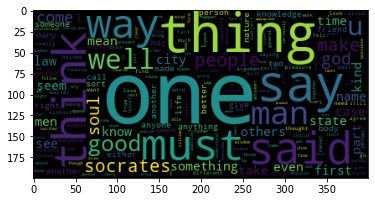

In [147]:
Plato_df=author("Plato")
Plato_df.head(3)

In [36]:
#school funtion takes school as input and generate a word cloud of that school as well as return a df contain word frequency
def school(name):
    school_word=[]
    for i in range(philosophy.shape[0]):
        if philosophy.iloc[i,2]==name:
            school_word+=philosophy.iloc[i,9]
    n_school_word=Counter(school_word)
    df_school_words=pd.DataFrame(n_school_word.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)


    new_school_words=' '.join(school_word)
    word_cloud =  WordCloud().generate(new_school_words)    
    plt.imshow(word_cloud)
    return df_school_words

A similar analyze could be conducted for each school. Here, I used "empiricism" as an example. As shown in the word cloud. "Idea" and "mind" has been used very often in this school which is different from what we obtained from the general trend. However, just by looking at the graphs and number is not accurate. In the next section, I will be performing hypothesis testing to see if each school talks differently.

word  frequency
3924  idea       5871
33     one       3375
58     may       2696

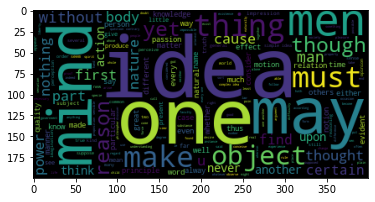

In [39]:
empiricism_df=school("empiricism")
empiricism_df.head(3)

## Does Each School Talk similarly?

In this section, I will use ANOVA test to see if the word choice of each school is similar.

The words that are tested is the top ten words used from all sentences (one,thing,would,must,time,also,many,say,u). The first step is to get the sum of each word in each school as shown below.

In [40]:
#create an empty df
schools=philosophy['school'].unique()
df_school=pd.DataFrame(columns=df_words.iloc[0:10,0])
df_school['school']=schools

In [41]:
#fill the df with word counts
for i in range(df_school.shape[0]):
    sum=0
    w=[]
    for j in range(philosophy.shape[0]):
        if philosophy.iloc[j,2]==df_school.iloc[i,10]:
            w+=philosophy.iloc[j,9]
    n_w=Counter(w)
    df=pd.DataFrame(n_w.items(),columns=['word','frequency'])
    for k in range(df_school.shape[1]-1):
        val=df[df['word']==df_school.columns[k]].index.values
        df_school.iloc[i,k]=df.iloc[val,1]

In [42]:
df_school

word   one thing would  must  time  also   may   man   say     u  \
0     5556  4609  3302  2374  1333  1165   690  2162  2971  2047   
1     9698  7365  2027  4481  2654  4344  2444  4100  2440  1168   
2     3375  2041  1258  1488   789   530  2696  1416   677  1980   
3     3099  3184  2103  1718   807  1002   790  1319  1137  2595   
4     6437  2457  4606  2004  2083  2055  3784   852  4255  1894   
5     4214  1152  1967  1529  1781  1130   743  1359   886  1020   
6     2863  2242   819  1535  1916   998   520   581   719  1497   
7     7302  3072  3149  2752  2359  3332  1483   309   971  1685   
8     1814   309   711   696  1225   556   608   334   493   333   
9     1610   408  2960  1257  1309   242  1613   381   310   238   
10     322   687    82   188   145   165   147   341    86    57   
11    2124   781   605   633   478   648   404  1063   437   408   
12    1772   385  1025   582   677   597   369  1863   339   216   

word           school  
0               plato  
1           aristotle  
2          empiricism  
3         rationalism  
4            analytic  
5         continental  
6       phenomenology  
7     german_idealism  
8           communism  
9          capitalism  
10           stoicism  
11          nietzsche  
12           feminism

In [58]:
#convert df to numpy array
f=df_school.iloc[0:13,0:10].to_numpy()
f=f.tolist()

Now, I will perform ANOVA test on the chart we just obtained. This test will tell us does the words choice differ by each school.

In [59]:
#anova test of all schools
f_oneway(f[0],f[1],f[2],f[3],f[4],f[5],f[6],f[7],f[8],f[9],f[10],f[11],f[12])

F_onewayResult(statistic=7.619955343937744, pvalue=2.8318483451450726e-10)

Here the p-value is 2.8318483451450726e-10, which is less than the significant level. Hence, we can conclude that not all school have similar word choice. This is easy to understand since there are 13 different school each has their own idea. It is reasonable that some school talk differently than others. Then my question become, are there some schools have similar word choice? To investigate this, I performed pairwised ANOVA test between every school. Here is a list of which the test is significant between the two schools.

In [45]:
#pairwised anova test, print all the pairs that is significant
for i in range(13):
    for j in range(i+1,13):
        s,t=f_oneway(chi[i],chi[j])
        if t >= 0.05:
            print(df_school.iloc[i,10]+" "+df_school.iloc[j,10])

plato aristotle
plato empiricism
plato rationalism
plato analytic
plato continental
plato german_idealism
aristotle analytic
aristotle german_idealism
empiricism rationalism
empiricism continental
empiricism phenomenology
empiricism german_idealism
empiricism capitalism
rationalism analytic
rationalism continental
rationalism phenomenology
rationalism german_idealism
rationalism capitalism
analytic german_idealism
continental phenomenology
continental german_idealism
continental capitalism
phenomenology german_idealism
phenomenology capitalism
phenomenology nietzsche
phenomenology feminism
communism capitalism
communism nietzsche
communism feminism
capitalism nietzsche
capitalism feminism
nietzsche feminism


This can give us insight on which schools have similar word choice. Based on this information, further inference can be made.